<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transform

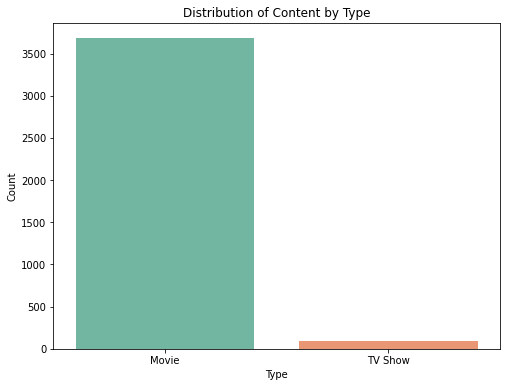

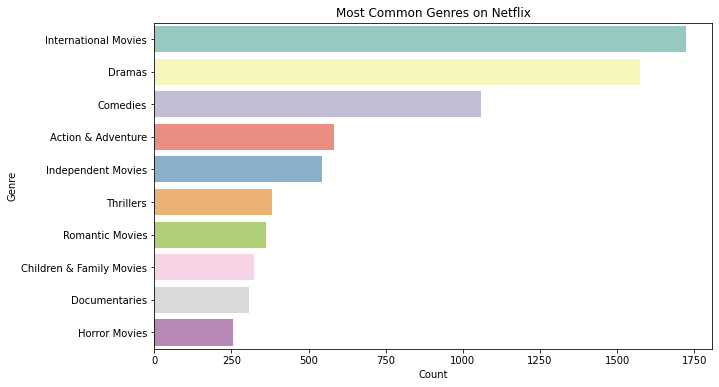

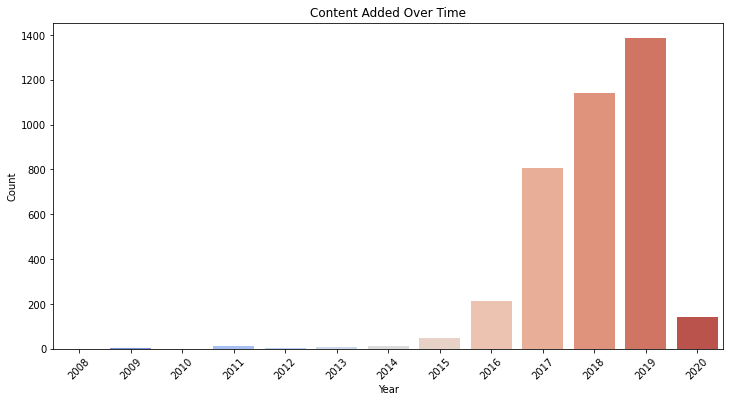

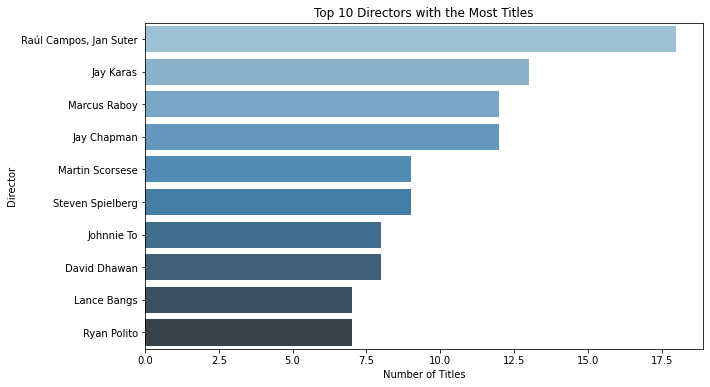

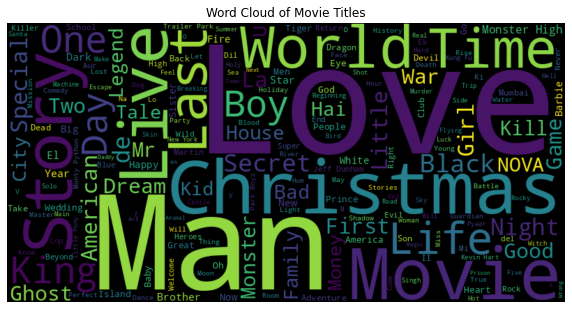

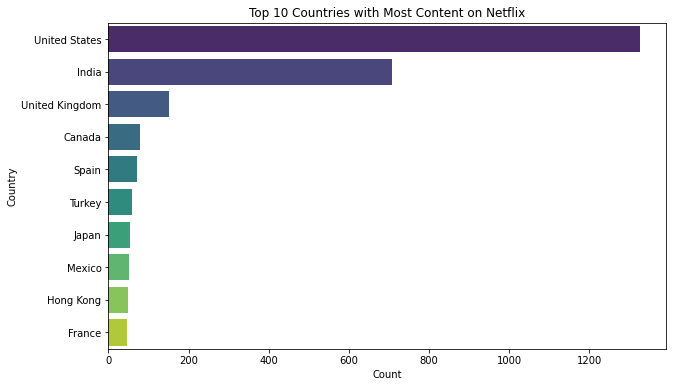

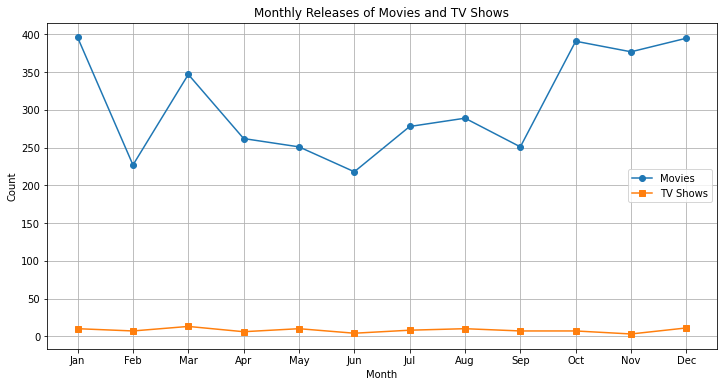

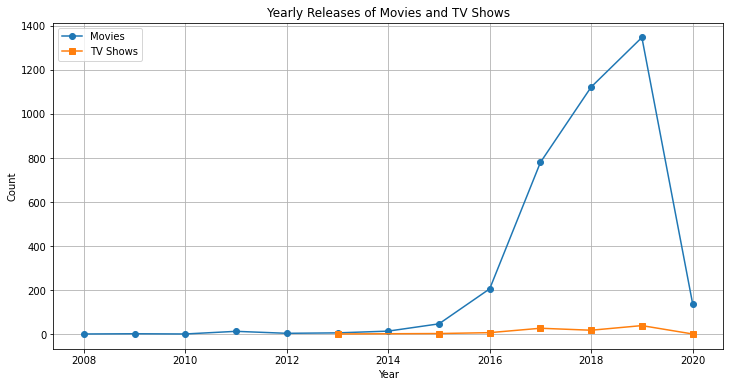

Cleaned data saved to cleaned_netflix_data.csv


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 2: Load the Dataset
dataset_path = "/home/rguktongole/Downloads/netflix_titles.csv"  # Replace with the path to your dataset
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(data.info())
print(data.head())

# Step 3: Data Cleaning
# Drop duplicates
data = data.drop_duplicates()

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Fill missing values or drop rows with missing critical information
data = data.dropna(subset=['director', 'cast', 'country'])

# Step 4: Exploratory Data Analysis (EDA)
# Content Type Distribution (Movies vs. TV Shows)
type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Most Common Genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Content Added Over Time
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Directors with the Most Titles
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Word Cloud of Movie Titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

# Top 10 Countries with Most Content
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Monthly Releases of Movies and TV Shows
monthly_movie_release = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='TV Shows', marker='s')
plt.title('Monthly Releases of Movies and TV Shows')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# Yearly Releases of Movies and TV Shows
yearly_movie_release = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_series_release = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies', marker='o')
plt.plot(yearly_series_release.index, yearly_series_release.values, label='TV Shows', marker='s')
plt.title('Yearly Releases of Movies and TV Shows')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Save Cleaned Data (Optional)
cleaned_data_path = "cleaned_netflix_data.csv"
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")
